In [44]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [45]:
train_x = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/independent_train.csv")
train_y = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/dependent_train.csv")
test_x = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/independent_test.csv")
test_y = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/dependent_test.csv")
print(train_x.shape)
train_x.head(5)

(256, 25)


,age,education-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,-0.596105,-1.436812,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.029636,1.854382,0.038178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.209024,0.867024,0.038178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.255474,-0.120334,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.494133,0.867024,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
print(train_y.shape)
train_y.head(5)

(256, 1)


,income
0,0
1,1
2,0
3,0
4,1


In [47]:
print(test_x.shape)
test_x.head(5)

(64, 25)


,age,education-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,1.339301,-1.765931,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.571549,-0.449454,1.821682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.952220,1.525263,0.929930,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.184468,-2.095050,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.952220,-0.120334,0.038178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
print(test_y.shape)
test_y.head(5)

(64, 1)


,income
0,0
1,0
2,1
3,0
4,0


In [49]:
#Calaculate the most frequent appearance in the class (0, 1)
most_freq_class = np.bincount(train_y.to_numpy().flatten()).argmax()
most_freq_class

0

In [50]:
#As the baseline will be a model which compute the largest class on the training data, 
# and predict everything in the test-data as belonging to that class
predictions = np.full_like(test_y, most_freq_class)
predictions.shape

(64, 1)

In [51]:
confusion_matrix = confusion_matrix(test_y, predictions)
accuracy = accuracy_score(test_y, predictions)

# Print results
print(f'Accuracy for Baseline model classification: {accuracy:.3f}')
print('Confusion Matrix: ')
print(confusion_matrix)

Accuracy for Baseline model classification: 0.688
Confusion Matrix: 
[[44  0]
 [20  0]]


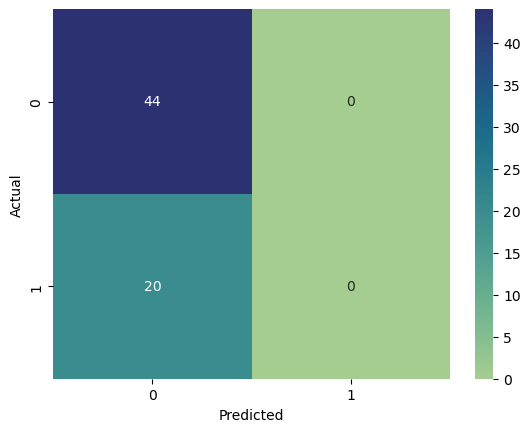

In [52]:
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap="crest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()